In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
fp = r"C:\Users\kervi\OneDrive\Documents\GitHub\JAN23_DA_Bien-Etre\notebooks\projet_world_happiness_pour_machine_learning.csv"

In [3]:
df = pd.read_csv(fp)
df.head()

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,South Asia,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,South Asia,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,South Asia,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,South Asia,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,South Asia,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [4]:
df_2021 = df[df.year == 2021]

In [5]:
df_before_2021 = df[df.year.between(2013,2020)] # pour approcher les 0.15 sur test_size

In [6]:
display(df_2021.shape)
display(df_before_2021.shape)

(149, 10)

(1053, 10)

In [7]:
(df_2021.shape[0] / df_before_2021.shape[0] * 100)

14.150047483380817

## LES METRIQUES

#### Dans une prédiction : l'Erreur = valeur réelle - valeur prédite --> elle peut être positive ou négative. 

#### L'Erreur quadratique est la valeur réelle - valeur prédite au carré (elle est du coup forcément positive). MSE (Mean squared error / Erreur quadratique moyenne) = la moyenne de toutes les Erreurs quadratiques.

#### RMSE (Root mean squared error / racine carrée de l'Erreur quadratique moyenne) = np.sqrt de la MSE. PERMET DE REMETTRE A L'ECHELLE les erreurs calculées par la MSE

#### L'Erreur absolue est la valeur absolue de l'Erreur (elle du coup forcément positive). MAE (Mean absolute error / Erreur absolue moyenne) = la moyenne des erreurs absolues.

## MSE --> utilisé lorsqu'on accorde une importance exponentielle aux erreurs. C'est à dire que la MSE pénalise beaucoup plus les grandes erreurs. Exemple : pour un estimateur de distance de freinage --> une erreur de 10 mètres n'est pas 10 fois plus grave qu'une erreur de 1 mètres MAIS PEUT ETRE 100 fois plus graves !

## MAE --> utilisé si l'importance d'une erreur est linéaire et si les plus grandes erreurs sont surtout dûes aux outliers. Dans ce cas la MAE donnera une meilleure représentation de la performance du modèle.

## MEDIAN ABSOLUTE ERROR = la médiane de toutes les Erreurs  --> PEU SENSIBLE AUX OUTLIERS

## Coefficient de determination (R2) --> Evalue la performance du modèle par rapport au niveau de variation présent dans les données. = 1 - Somme des erreurs quadratiques / la Variance. le R2 permet de savoir à quel niveau le modèle décrit les variations de la variable cible. exemple : le modèle décrit 90% des variations du score du bonheur!

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve


In [9]:
# Séparation des variables explicatives de la variable cible
# Diviser les données en ensemble d'entraînement et ensemble de test

X_train = df_before_2021.drop(['Life_Ladder', 'year', 'Country_name'], axis=1)
X_test = df_2021.drop(['Life_Ladder', 'year', 'Country_name'], axis=1)
y_train = df_before_2021['Life_Ladder']
y_test = df_2021['Life_Ladder']

In [10]:
# Utilisation de la méthode get_dummies pour encoder la variable catégorielle
X_train_encoded = pd.get_dummies(X_train, columns=['Regional_indicator'])
X_test_encoded = pd.get_dummies(X_test, columns=['Regional_indicator'])


In [11]:
X_train_encoded.head()

,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Regional_indicator_Central and Eastern Europe,Regional_indicator_Commonwealth of Independent States,Regional_indicator_East Asia,Regional_indicator_Latin America and Caribbean,Regional_indicator_Middle East and North Africa,Regional_indicator_North America and ANZ,Regional_indicator_South Asia,Regional_indicator_Southeast Asia,Regional_indicator_Sub-Saharan Africa,Regional_indicator_Western Europe
5,7.725,0.484,52.56,0.578,0.061,0.823,0,0,0,0,0,0,1,0,0,0
6,7.718,0.526,52.88,0.509,0.104,0.871,0,0,0,0,0,0,1,0,0,0
7,7.702,0.529,53.20,0.389,0.080,0.881,0,0,0,0,0,0,1,0,0,0
8,7.697,0.559,53.00,0.523,0.042,0.793,0,0,0,0,0,0,1,0,0,0
9,7.697,0.491,52.80,0.427,-0.121,0.954,0,0,0,0,0,0,1,0,0,0


In [12]:
X_test_encoded.head()

,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Regional_indicator_Central and Eastern Europe,Regional_indicator_Commonwealth of Independent States,Regional_indicator_East Asia,Regional_indicator_Latin America and Caribbean,Regional_indicator_Middle East and North Africa,Regional_indicator_North America and ANZ,Regional_indicator_South Asia,Regional_indicator_Southeast Asia,Regional_indicator_Sub-Saharan Africa,Regional_indicator_Western Europe
1875,10.775,0.954,72.0,0.949,-0.098,0.186,0,0,0,0,0,0,0,0,0,1
1876,10.933,0.954,72.7,0.946,0.030,0.179,0,0,0,0,0,0,0,0,0,1
1877,11.117,0.942,74.4,0.919,0.025,0.292,0,0,0,0,0,0,0,0,0,1
1878,10.878,0.983,73.0,0.955,0.160,0.673,0,0,0,0,0,0,0,0,0,1
1879,10.932,0.942,72.4,0.913,0.175,0.338,0,0,0,0,0,0,0,0,0,1


In [13]:
# FONCTIONS POUR TESTER PLUSIEURS ALGORITHMES DE ML

def test_models(X_train, y_train, X_test, y_test):
    
    # Standardisation des variables explicatives
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Liste des modèles à tester
    models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor()]
    
    # Dictionnaire pour stocker les scores de chaque modèle
    scores = {'model': [], 'mse': [], 'rmse': [], 'r2': [], 'mae': []}
    train_scores = {'model': [], 'mse': [], 'rmse': [], 'r2': [], 'mae': []}
    
    # Boucle sur les modèles
    for model in models:
        
        # Entraînement du modèle
        model.fit(X_train, y_train)
        
        # Prédiction sur l'ensemble de test
        y_pred = model.predict(X_test)
        
        # Prédiction à l'entrainement
        y_train_pred = model.predict(X_train)
        
        # Calcul des scores d'entrainement
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        
        
        
        # Calcul des scores de test
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        
        # Stockage des scores dans le dictionnaire
        scores['model'].append(type(model).__name__)
        train_scores['model'].append(type(model).__name__)
        

        
        
        train_scores['mse'].append(train_mse)
        train_scores['rmse'].append(train_rmse)
        train_scores['r2'].append(train_r2)
        train_scores['mae'].append(train_mae)
    
        scores['mse'].append(mse)
        scores['rmse'].append(rmse)
        scores['r2'].append(r2)
        scores['mae'].append(mae)
        
        
    # Conversion du dictionnaire en DataFrame
    scores_df = pd.DataFrame(scores)
    train_scores_df = pd.DataFrame(train_scores)
    
    return scores_df, train_scores_df
    

# Tester les modèles
results = test_models(X_train_encoded, y_train, X_test_encoded, y_test)
results


(                   model       mse      rmse        r2       mae
 0       LinearRegression  0.241572  0.491500  0.789125  0.377233
 1                  Lasso  1.147823  1.071365 -0.001966  0.877528
 2                  Ridge  0.241518  0.491445  0.789173  0.377214
 3  DecisionTreeRegressor  0.099188  0.314942  0.913416  0.202664
 4  RandomForestRegressor  0.056624  0.237958  0.950571  0.164801,
                    model       mse      rmse        r2       mae
 0       LinearRegression  0.259414  0.509327  0.798572  0.389878
 1                  Lasso  1.287871  1.134844  0.000000  0.945533
 2                  Ridge  0.259414  0.509327  0.798571  0.389878
 3  DecisionTreeRegressor  0.000000  0.000000  1.000000  0.000000
 4  RandomForestRegressor  0.021650  0.147138  0.983190  0.108021)

## Courbe de régréssion d'apprentissage et de test pour RandomForestRegressor

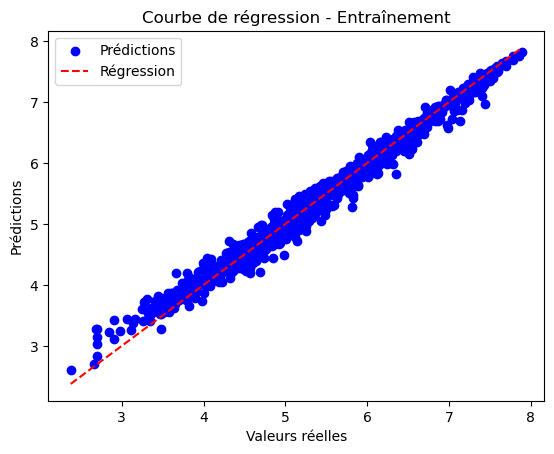

In [14]:
import matplotlib.pyplot as plt

# Entraînement du modèle sur l'ensemble des données
model = RandomForestRegressor()
model.fit(X_train_encoded, y_train)

# Prédiction sur l'ensemble des données
y_pred_train = model.predict(X_train_encoded)

# Tracé de la courbe de régression
plt.scatter(y_train, y_pred_train, color='blue', label='Prédictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Courbe de régression - Entraînement')
plt.legend()
plt.show()

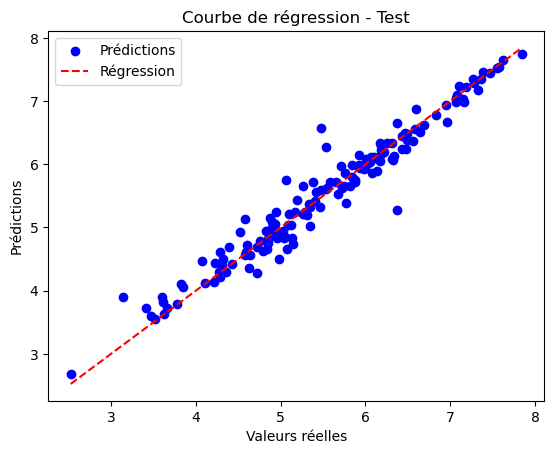

In [15]:
import matplotlib.pyplot as plt

# Prédiction sur l'ensemble de test
y_pred_test = model.predict(X_test_encoded)

# Tracé de la courbe de régression
plt.scatter(y_test, y_pred_test, color='blue', label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Courbe de régression - Test')
plt.legend()
plt.show()


## LEARNING CURVE

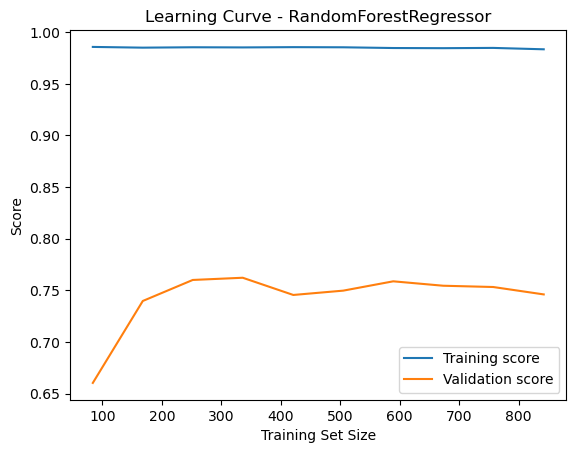

In [16]:
RF_model = RandomForestRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(RF_model, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - RandomForestRegressor')
plt.legend()
plt.show()

#### Si la courbe d'apprentissage pour l'ensemble d'entraînement reste horizontale à un score de 1, cela pourrait signifier que le modèle est capable de parfaitement s'adapter aux données d'entraînement. Cela peut se produire lorsque le modèle est surajusté (overfitting) aux données d'entraînement.

#### Il y a quelques raisons possibles pour lesquelles cela se produit :

#### Surajustement (overfitting) : Le modèle mémorise les données d'entraînement au lieu de généraliser.

#### Données d'entraînement limitées : Si la taille de l'ensemble d'entraînement est petite, il est possible que le modèle puisse mémoriser les données sans avoir à généraliser. L'ajout de plus de données d'entraînement peut aider à améliorer la performance du modèle.


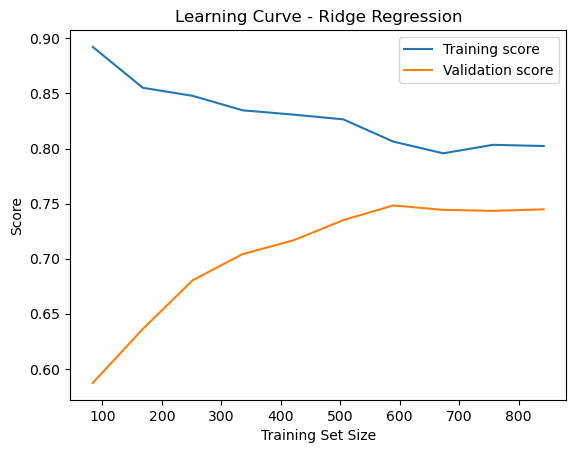

In [17]:
ridge_model = Ridge()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(ridge_model, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - Ridge Regression')
plt.legend()
plt.show()


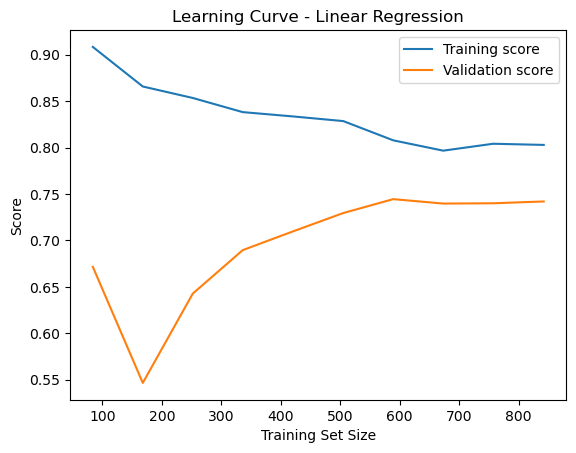

In [18]:
Linear_reg_model = LinearRegression()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(Linear_reg_model, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - Linear Regression')
plt.legend()
plt.show()

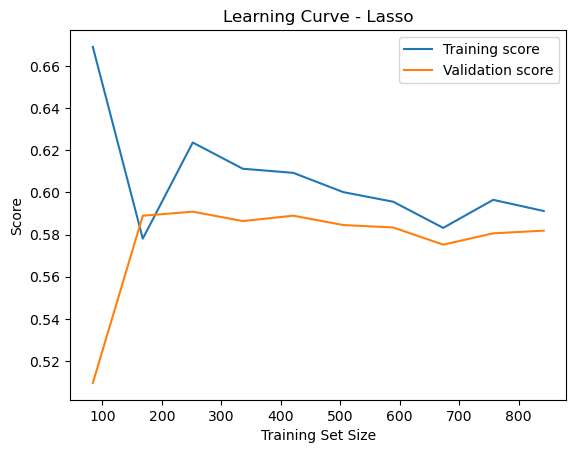

In [19]:
Lasso_model = Lasso()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(Lasso_model, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - Lasso')
plt.legend()
plt.show()

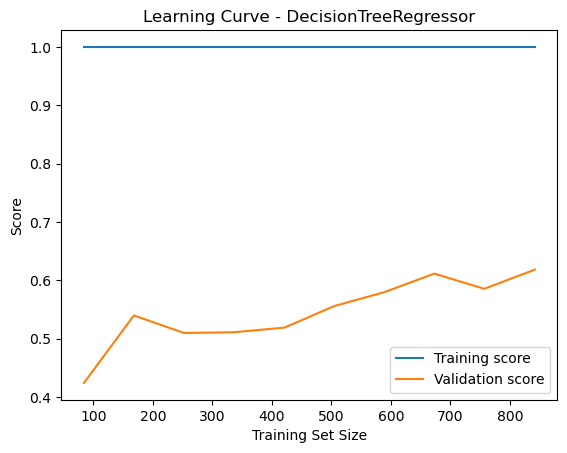

In [20]:
DTR_model = DecisionTreeRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(DTR_model, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - DecisionTreeRegressor')
plt.legend()
plt.show()

In [21]:
results

(                   model       mse      rmse        r2       mae
 0       LinearRegression  0.241572  0.491500  0.789125  0.377233
 1                  Lasso  1.147823  1.071365 -0.001966  0.877528
 2                  Ridge  0.241518  0.491445  0.789173  0.377214
 3  DecisionTreeRegressor  0.099188  0.314942  0.913416  0.202664
 4  RandomForestRegressor  0.056624  0.237958  0.950571  0.164801,
                    model       mse      rmse        r2       mae
 0       LinearRegression  0.259414  0.509327  0.798572  0.389878
 1                  Lasso  1.287871  1.134844  0.000000  0.945533
 2                  Ridge  0.259414  0.509327  0.798571  0.389878
 3  DecisionTreeRegressor  0.000000  0.000000  1.000000  0.000000
 4  RandomForestRegressor  0.021650  0.147138  0.983190  0.108021)

## Courbe de régréssion d'apprentissage et de test pour RIDGE

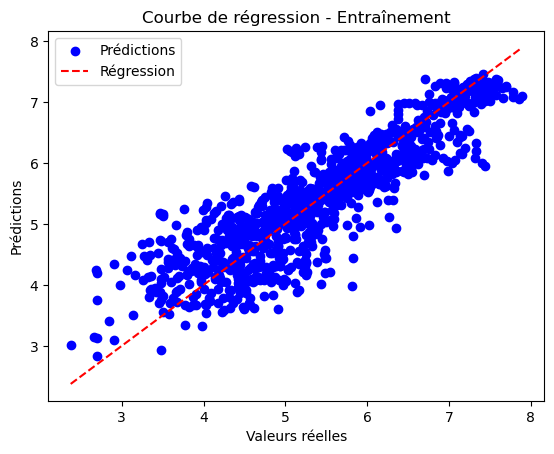

In [22]:
ridge_model = Ridge()
ridge_model.fit(X_train_encoded, y_train)

# Prédiction sur l'ensemble des données
y_pred_train = ridge_model.predict(X_train_encoded)

# Tracé de la courbe de régression
plt.scatter(y_train, y_pred_train, color='blue', label='Prédictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Courbe de régression - Entraînement')
plt.legend()
plt.show()

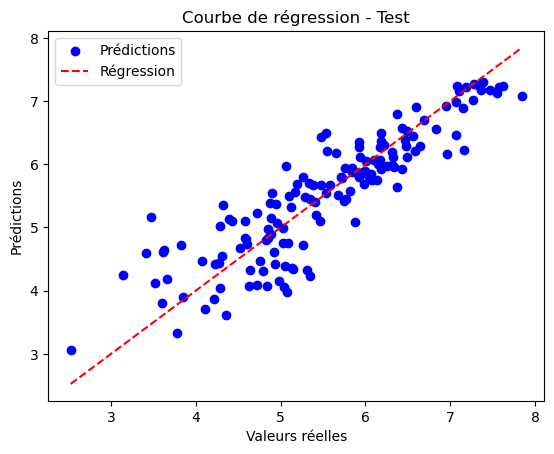

In [23]:
# Prédiction sur l'ensemble de test
y_pred_test = ridge_model.predict(X_test_encoded)

# Tracé de la courbe de régression
plt.scatter(y_test, y_pred_test, color='blue', label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Courbe de régression - Test')
plt.legend()
plt.show()

## On remarque que plus les scores du bonheur sont élevés, plus nos prédictions sont précises

## BOOSTING ET BAGGING

In [24]:
# FONCTIONS POUR TESTER PLUSIEURS ALGORITHMES DE BOOSTING ET BAGGING

from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor

def test_ensemble_models(X_train, y_train, X_test, y_test):
    
    # Standardisation des variables explicatives
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Liste des modèles à tester
    models = [BaggingRegressor(), GradientBoostingRegressor(), AdaBoostRegressor()]
    
    # Dictionnaire pour stocker les scores de chaque modèle
    scores = {'model': [], 'mse': [], 'rmse': [], 'r2': [], 'mae': []}
    train_scores = {'model': [], 'mse': [], 'rmse': [], 'r2': [], 'mae': []}
    
    # Boucle sur les modèles
    for model in models:
        
        # Entraînement du modèle
        model.fit(X_train, y_train)
        
        # Prédiction sur l'ensemble de test
        y_pred = model.predict(X_test)
        
        # Prédiction à l'entrainement
        y_train_pred = model.predict(X_train)
        
        # Calcul des scores d'entrainement
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        
        
        
        # Calcul des scores de test
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        
        # Stockage des scores dans le dictionnaire
        scores['model'].append(type(model).__name__)
        train_scores['model'].append(type(model).__name__)
        

        
        
        train_scores['mse'].append(train_mse)
        train_scores['rmse'].append(train_rmse)
        train_scores['r2'].append(train_r2)
        train_scores['mae'].append(train_mae)
    
        scores['mse'].append(mse)
        scores['rmse'].append(rmse)
        scores['r2'].append(r2)
        scores['mae'].append(mae)
        
        
    # Conversion du dictionnaire en DataFrame
    scores_df = pd.DataFrame(scores)
    train_scores_df = pd.DataFrame(train_scores)
    
    return scores_df, train_scores_df
    

# Tester les modèles
results_ensemble = test_ensemble_models(X_train_encoded, y_train, X_test_encoded, y_test)
results_ensemble


(                       model       mse      rmse        r2       mae
 0           BaggingRegressor  0.074783  0.273465  0.934720  0.174058
 1  GradientBoostingRegressor  0.120530  0.347174  0.894786  0.268643
 2          AdaBoostRegressor  0.211777  0.460193  0.815134  0.377700,
                        model       mse      rmse        r2       mae
 0           BaggingRegressor  0.029994  0.173189  0.976710  0.121196
 1  GradientBoostingRegressor  0.109331  0.330653  0.915107  0.255767
 2          AdaBoostRegressor  0.204933  0.452696  0.840874  0.370706)

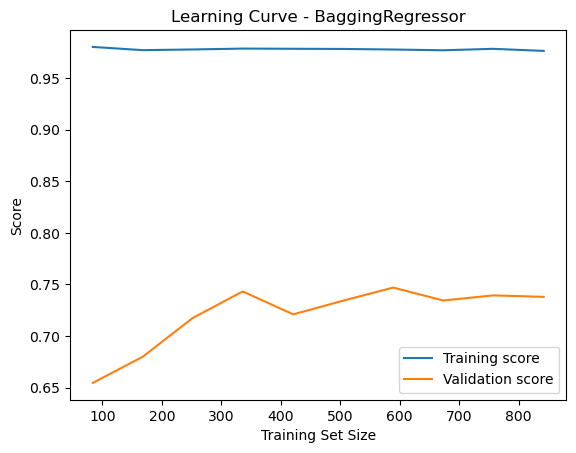

In [25]:
BR_model = BaggingRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(BR_model, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - BaggingRegressor')
plt.legend()
plt.show()

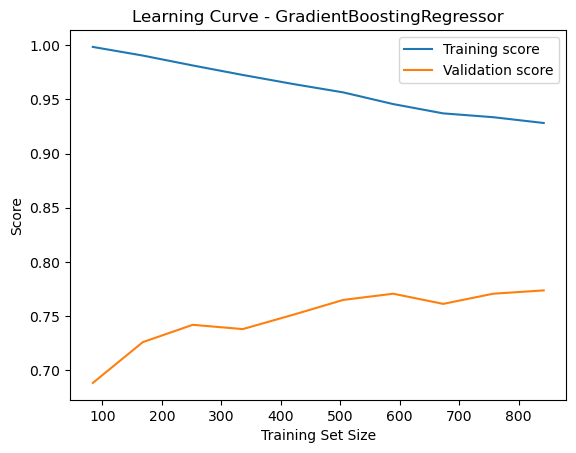

In [26]:
GBR_model = GradientBoostingRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(GBR_model, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - GradientBoostingRegressor')
plt.legend()
plt.show()

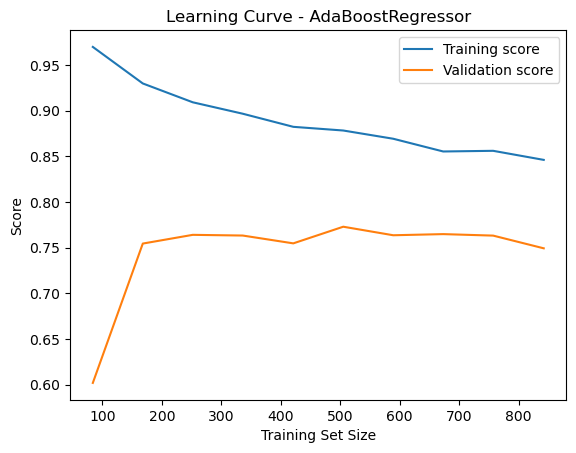

In [27]:
ABR_model = AdaBoostRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(ABR_model, X_train_encoded, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - AdaBoostRegressor')
plt.legend()
plt.show()

# CHOIX DE L'ALGORITHME POUR LA PREDICTION DU SCORE DU BONHEUR

#### Le choix se porte sur l'algorithme de la régression Ridge en se basant sur les métriques R2 et MAE et les courbes d'apprentissage (learning curves) où on peut observer la stabilité et la cohérence entre le score d'entrainement et le score de validation.

#### Le coefficient de détermination R2 de 0.789173 indique que le modèle explique environ 79% de la variance totale de la variable cible. Cela signifie que les variables explicatives incluses dans le modèle expliquent une grande partie de la variation observée dans les valeurs réelles de la variable cible. Une valeur de R2 élevée suggère une bonne adéquation du modèle aux données.

#### L'erreur absolue moyenne (MAE) est une mesure de la performance du modèle qui quantifie l'erreur moyenne entre les prédictions du modèle et les valeurs réelles. Une MAE de 0.377214 signifie que, en moyenne, les prédictions du modèle diffèrent de 0.377214 unités de la valeur réelle.
#### Dans notre cas cela signifie que les prédictions sont en moyenne proches des valeurs réelles.


#### La régression Ridge est une méthode de régularisation qui permet d'éviter le surajustement.


## AJUSTEMENT DES HYPERPARAMETRES

#### 1-Définir une grille de valeurs pour les hyperparamètres à ajuster. Dans le cas de la régression Ridge, le principal hyperparamètre à régler est l'alpha, qui contrôle le degré de régularisation.

#### 2-Utiliser la fonction GridSearchCV pour effectuer la recherche des meilleurs hyperparamètres en utilisant une validation croisée.

#### 3-Appliquer la recherche des hyperparamètres sur le jeu de données d'entraînement pour ajuster les modèles Ridge correspondant à chaque combinaison d'hyperparamètres et évaluer leur performance à l'aide de la validation croisée.

#### 4-Obtenir les meilleurs hyperparamètres en utilisant l'attribut best_params_ de l'objet GridSearchCV.

#### 5-Réentraîner le modèle Ridge en utilisant les meilleurs hyperparamètres sur l'ensemble de données d'entraînement complet.

In [28]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


# Définir la grille d'hyperparamètres
alpha_grid = [0.1, 1.0, 10.0]

# Créer l'estimateur Ridge
ridge = Ridge()

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alpha_grid}, cv=5)

# Effectuer la recherche des hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Obtenir les meilleurs hyperparamètres
best_alpha = grid_search.best_params_['alpha']

# Réentraîner le modèle Ridge avec les meilleurs hyperparamètres
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)


Ridge(alpha=10.0)

In [29]:
# Prédiction sur l'ensemble de test
y_pred = ridge_best.predict(X_test_scaled)

# Calcul des scores
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAE: ", mae)

MSE:  0.24110034491084523
RMSE:  0.4910196991067112
R2:  0.7895370566874194
MAE:  0.37706380938803846


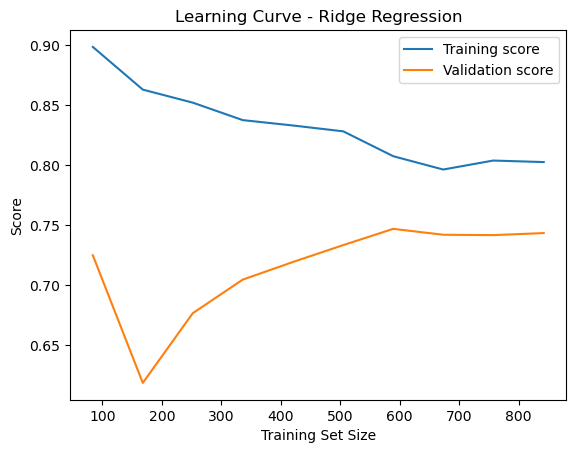

In [30]:

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(ridge_best, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - Ridge Regression')
plt.legend()
plt.show()

## FEATURE IMPORTANCE

In [31]:
# Obtention des noms de colonnes après l'encodage one-hot
encoded_feature_names = list(X_train_encoded.columns)

In [32]:
# Obtention des scores d'importance des fonctionnalités
importance_scores = ridge_best.coef_

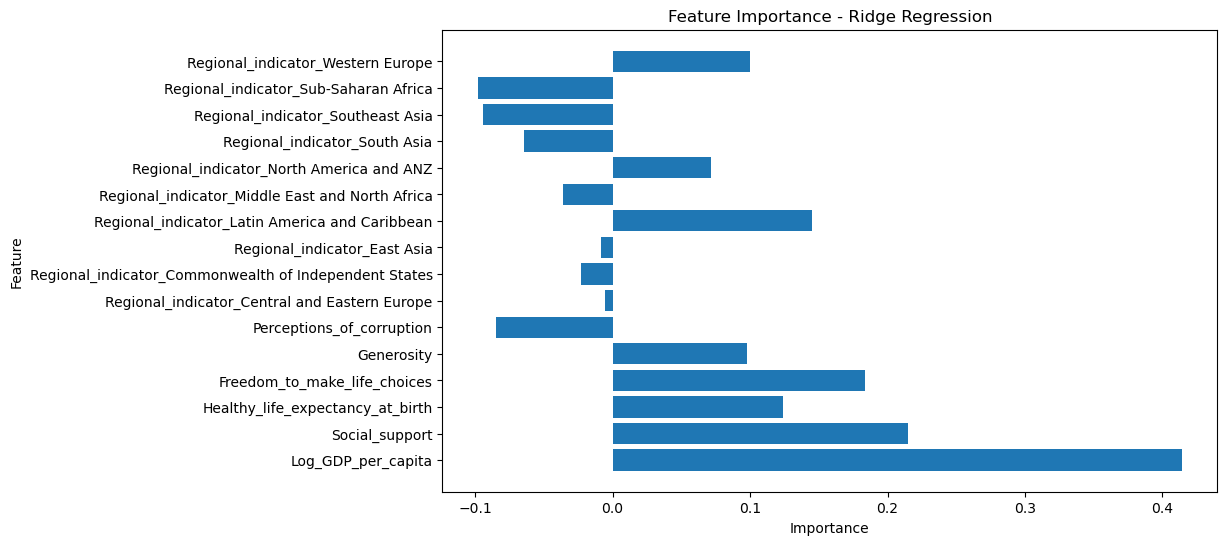

In [33]:
# Tracé des scores d'importance des fonctionnalités
plt.figure(figsize=(10, 6))
plt.barh(encoded_feature_names, importance_scores)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Ridge Regression')
plt.show()

In [34]:
feature_importance = list(zip(encoded_feature_names, importance_scores))

In [35]:
feature_importance_sorted = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

In [36]:
sorted_features, sorted_scores = zip(*feature_importance_sorted)

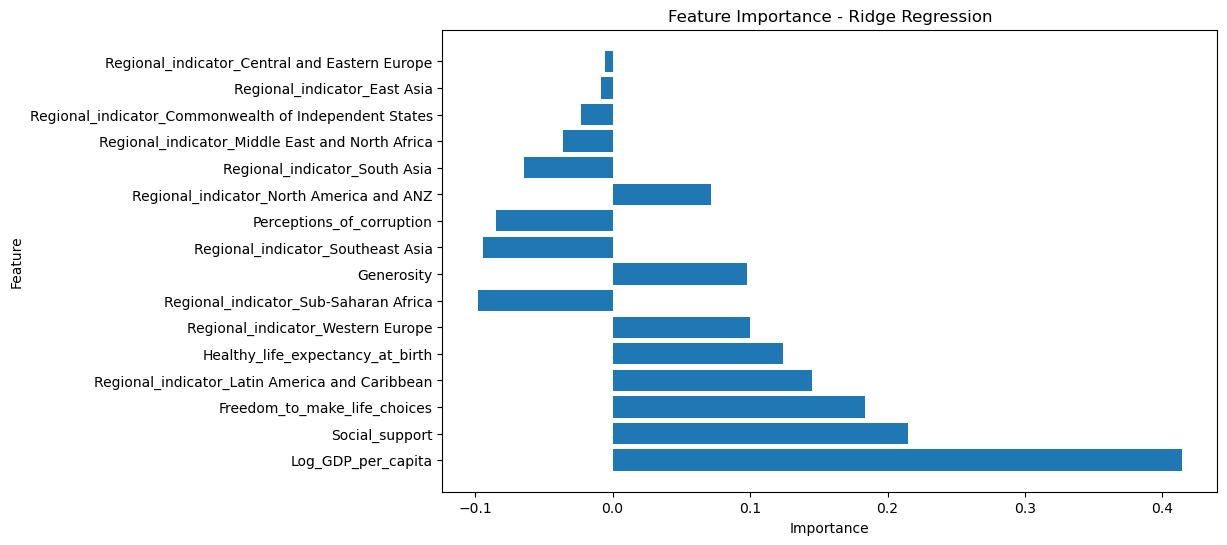

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_scores)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Ridge Regression')
plt.show()

In [38]:
from sklearn.feature_selection import RFECV

# Création de l'objet RFECV avec le modèle Ridge et la validation croisée
rfecv = RFECV(estimator=ridge_best, cv=5)

# Ajustement du RFECV sur les données d'entraînement
rfecv.fit(X_train_encoded, y_train)

# Nombre optimal de variables sélectionnées
num_features = rfecv.n_features_

# Variables sélectionnées
selected_features = X_train_encoded.columns[rfecv.support_]

print("Nombre optimal de variables sélectionnées:", num_features)
print("Variables sélectionnées:", selected_features)

Nombre optimal de variables sélectionnées: 8
Variables sélectionnées: Index(['Log_GDP_per_capita', 'Social_support', 'Freedom_to_make_life_choices',
       'Generosity', 'Perceptions_of_corruption',
       'Regional_indicator_Latin America and Caribbean',
       'Regional_indicator_North America and ANZ',
       'Regional_indicator_Western Europe'],
      dtype='object')


In [39]:
from sklearn.feature_selection import SelectKBest, f_regression

# Sélection des meilleures variables
selector = SelectKBest(score_func=f_regression, k=8)
X_train_selected = selector.fit_transform(X_train_encoded, y_train)
X_test_selected = selector.transform(X_test_encoded)

# Normalisation des variables
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

# Entraînement du modèle avec les variables sélectionnées
ridge_model_selected = Ridge(alpha=1.0)  # Utilisez les hyperparamètres appropriés
ridge_model_selected.fit(X_train_selected, y_train)

# Prédictions sur l'ensemble de test avec les variables sélectionnées
y_pred_selected = ridge_model_selected.predict(X_test_selected)

# Évaluation des performances du modèle
mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)
r2_selected = r2_score(y_test, y_pred_selected)
mae_selected = mean_absolute_error(y_test, y_pred_selected)

# Affichage des performances du modèle
print("MSE (Mean Squared Error) :", mse_selected)
print("RMSE (Root Mean Squared Error) :", rmse_selected)
print("R2 Score :", r2_selected)
print("MAE (Mean Absolute Error) :", mae_selected)


MSE (Mean Squared Error) : 0.2757635257031133
RMSE (Root Mean Squared Error) : 0.5251319126687248
R2 Score : 0.759278638530388
MAE (Mean Absolute Error) : 0.40867884769527896


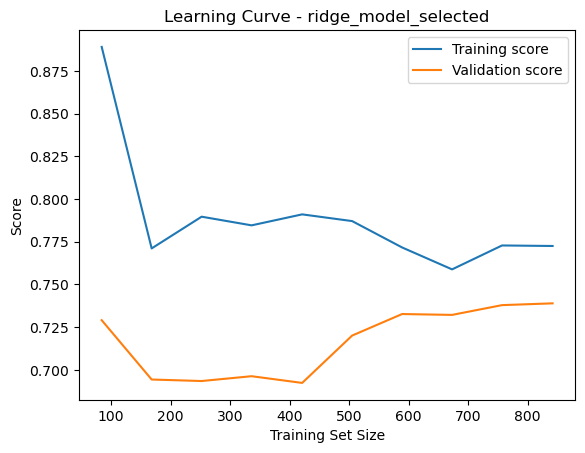

In [40]:

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(ridge_model_selected, X_train_selected, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - ridge_model_selected')
plt.legend()
plt.show()

# Finalement le modèle est plus performant lorsqu'il utilise toues les variables excplicatives

# SAUVEGARDE DU MODELE

In [41]:
from joblib import dump, load

dump(ridge_best, 'ridge_model.joblib')


['ridge_model.joblib']

In [42]:
# Chargement du modèle sauvegardé
loaded_model = load('ridge_model.joblib')

# Utilisation du modèle chargé pour faire des prédictions
loaded_model.predict(X_test_scaled)

array([7.09970649, 7.24643584, 7.22853716, 7.15277157, 7.18850431,
       7.31752994, 7.19266151, 7.22989896, 7.28659751, 7.02715438,
       7.23930156, 6.24192195, 6.88818615, 7.17563082, 7.22597752,
       6.46276733, 6.99836875, 6.17934258, 6.92024954, 6.55479625,
       6.70269083, 6.29109393, 6.92290518, 6.19855433, 6.43102986,
       6.1226033 , 6.52368633, 6.27826952, 6.4048305 , 5.93685938,
       6.58110273, 6.75500029, 5.65613308, 5.96442285, 6.12462769,
       6.18531011, 6.01403534, 5.98663752, 6.27246139, 6.39526578,
       6.47647897, 5.97652038, 6.25834601, 6.07010522, 6.01585031,
       5.75303617, 6.05681177, 5.75749003, 5.83987771, 5.75947334,
       5.84583057, 6.04764797, 5.91415159, 5.68455222, 5.9081906 ,
       6.11693077, 6.26621767, 6.3572933 , 5.81842235, 5.89009061,
       5.10087977, 5.84560671, 5.9333826 , 5.59406966, 5.46443568,
       5.93936034, 5.46252837, 5.76593121, 5.81308032, 5.55323303,
       6.19122221, 5.67614438, 6.20471304, 6.46624065, 5.54105